# Definicion del negocio
Imaginece que trabaja para la empresa "Arrendamientos Nutibara SAS" la cual esta abriendo una nueva sede en el estado de California USA, y te contratan para la construccion de un sistema que prediga los precios de las casa del estado de California, para esta primera etapa deberás construir un pipeline que limpie y filtre la data. 

## Definicion de las columnas de la base de datos
1. longitude: medida de qué tan al oeste está una casa; un valor más alto es más al oeste
2. latitude: medida de qué tan al norte está una casa; un valor más alto es más al norte
3. housingMedianAge: edad media de una casa dentro de un bloque; un número más bajo es un edificio más nuevo
4. totalRooms: número total de habitaciones dentro de un bloque
5. totalBedrooms: número total de dormitorios dentro de un bloque
6. population: número total de personas que residen dentro de un bloque
7. homes: número total de hogares, un grupo de personas que residen dentro de una unidad de vivienda, para un bloque
8. medianIncome: ingreso medio para hogares dentro de un bloque de casas (medido en decenas de miles de dólares estadounidenses)
9. medianHouseValue: valor medio de la casa para hogares dentro de un bloque (medido en dólares estadounidenses)
10. oceanProximity: ubicación de la casa con respecto al océano/mar

## Importación de librerías

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Carga de  dataset

In [6]:
df = pd.read_csv("housing.csv")

## Vistazo a la estructura de la Data

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Identificación de la información del Dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### Total de registros = 20604

### Un vistaso mas profundo a los datos

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Identificación de registros faltantes

In [10]:
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

## Columnas con registros faltantes
- total_bedrooms : numero de habitaciones faltantes 

In [11]:
registros_faltante = df['total_bedrooms'].isna().sum()
registros_faltante

np.int64(207)

# Analisis exploratorio de la data

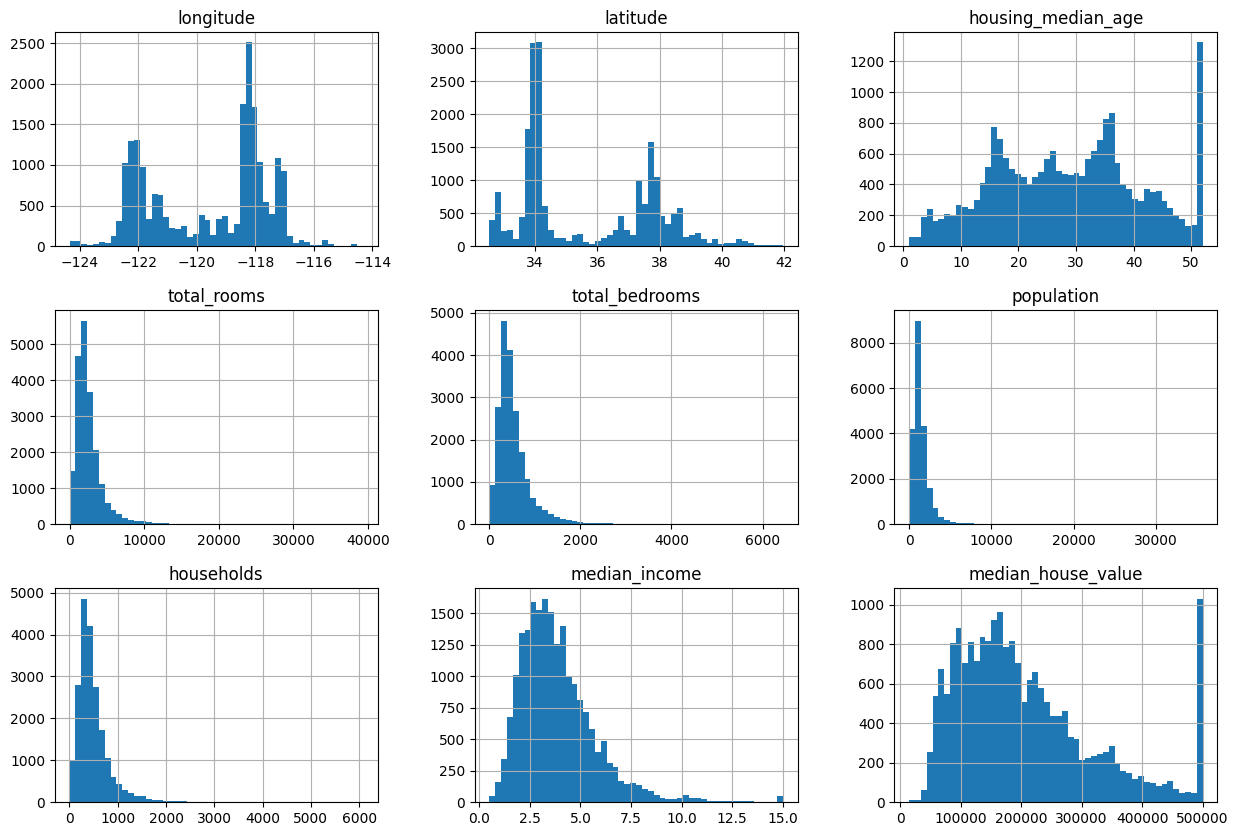

In [12]:
df.hist(bins=50,figsize=(15,10))
plt.show()

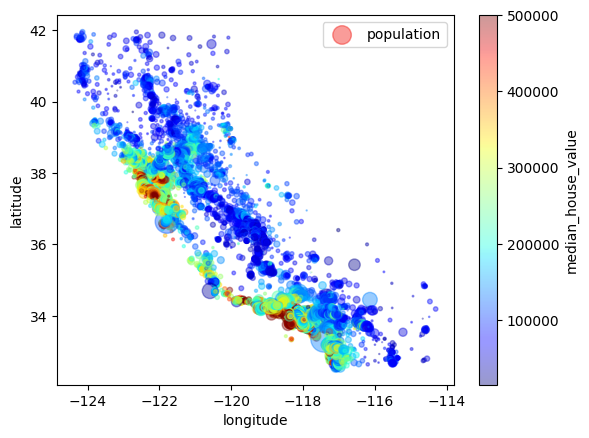

In [13]:
df.plot(kind='scatter', x = 'longitude',y = 'latitude',alpha = 0.4,s=df['population']/100,label='population',c = 'median_house_value', cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

### Comparacion con mapa real

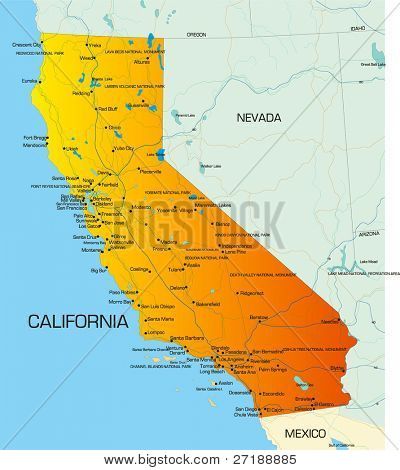

In [14]:
mapa_california = Image.open('mapa_california.jpg')
mapa_california

## Interpretacion de los diagramas

Por hacer

# Buscando Correlaciones

In [73]:
matriz_correlacion = df.copy()
matriz_correlacion = matriz_correlacion.drop("ocean_proximity",axis=1)
matriz_correlacion = matriz_correlacion.corr()
matriz_correlacion

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


## Organizacion de la matriz en base a la variable predictoria

In [74]:
matriz_correlacion["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

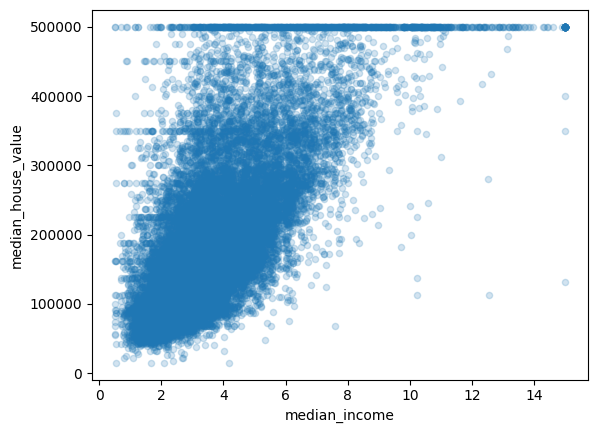

In [75]:
df.plot(kind = 'scatter',x = 'median_income',y = 'median_house_value',alpha=0.2)

### Posibles significados de las correlaciones

Por hacer